In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

2024-11-07 18:21:56.630945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-07 18:21:56.651898: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-07 18:21:56.657531: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 18:21:56.671132: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Number of GPUs available: {len(gpus)}")
    # Optionally, set memory growth to avoid TensorFlow allocating all the GPU memory at once
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("No GPU found. Using CPU instead.")

Number of GPUs available: 8


In [3]:
# Define directories
train_dir = '/raid/home/minan/home/project/project/newdataset/train'
test_dir = '/raid/home/minan/home/project/project/newdataset/test'

In [4]:

# Data preprocessing (without augmentation)
train_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)
# Load the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust based on your model
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Adjust based on your model
    batch_size=32,
    class_mode='binary'
)

Found 3999 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


In [5]:
# Load the pretrained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)  # For binary classification

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(train_generator, epochs=30, validation_data=test_generator)

2024-11-07 18:22:20.294418: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22059 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2024-11-07 18:22:20.296587: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 31231 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2024-11-07 18:22:20.298408: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 16380 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2024-11-07 18:22:20.300214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 26484 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bu

Epoch 1/30


/raid/home/minan/home/project/project/myenv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730983949.014783 3188091 service.cc:146] XLA service 0x7fb634002b80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730983949.014833 3188091 service.cc:154]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1730983949.014849 3188091 service.cc:154]   StreamExecutor device (1): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1730983949.014853 3188091 service.cc:154]   StreamExecutor device (2): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1730983949.014857 3188091 se

  1/125 ━━━━━━━━━━━━━━━━━━━━ 29:24 14s/step - accuracy: 0.5000 - loss: 0.7530

I0000 00:00:1730983957.603413 3188091 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 378ms/step - accuracy: 0.5083 - loss: 0.6978 - val_accuracy: 0.6456 - val_loss: 0.6850
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 215ms/step - accuracy: 0.5169 - loss: 0.6933 - val_accuracy: 0.5443 - val_loss: 0.6880
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 216ms/step - accuracy: 0.5347 - loss: 0.6922 - val_accuracy: 0.5949 - val_loss: 0.6857
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 215ms/step - accuracy: 0.5369 - loss: 0.6880 - val_accuracy: 0.6203 - val_loss: 0.6853
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 216ms/step - accuracy: 0.5435 - loss: 0.6877 - val_accuracy: 0.5316 - val_loss: 0.6928
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 214ms/step - accuracy: 0.5425 - loss: 0.6845 - val_accuracy: 0.5949 - val_loss: 0.6869
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 217ms/step - accuracy: 0.5689 - loss: 0.6833 - val_accuracy: 0.5823 - val_loss: 0.6867
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 30s 231ms/step - accuracy: 0.5589 - loss: 0.6826 - val

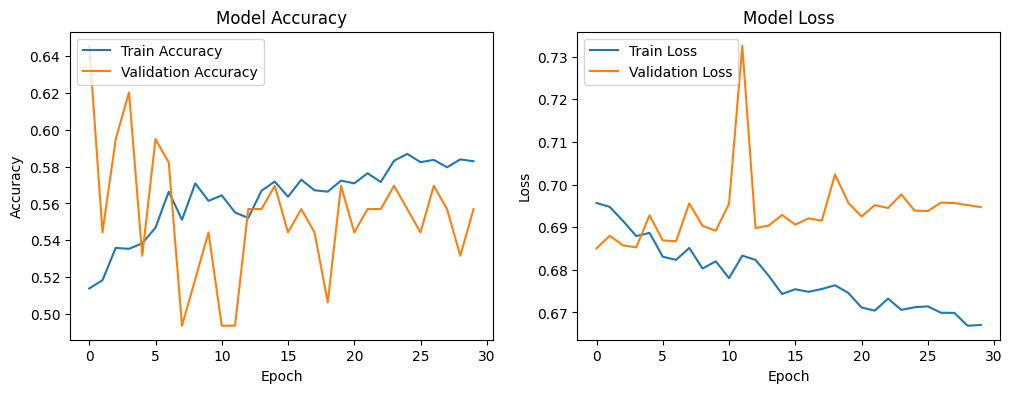

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.5832 - loss: 0.6892
Test Accuracy: 55.70%
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
Precision: 0.53
Recall: 0.44
F1 Score: 0.48
Confusion Matrix:
[[25 15]
 [22 17]]

Classification Report:
              precision    recall  f1-score   support

        high       0.53      0.62      0.57        40
         low       0.53      0.44      0.48        39

    accuracy                           0.53        79
   macro avg       0.53      0.53      0.53        79
weighted avg       0.53      0.53      0.53        79



In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predict on the test set to calculate precision, recall, F1-score, and confusion matrix
y_true = test_generator.classes  # True labels
y_pred = (model.predict(test_generator) > 0.5).astype(int)  # Predicted labels (binary thresholding)

# Calculate precision, recall, F1-score, and print them
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Displaying the classification report for a comprehensive view of metrics
print('\nClassification Report:')
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

In [8]:

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.5558 - loss: 0.6920
Test Accuracy: 55.70%
